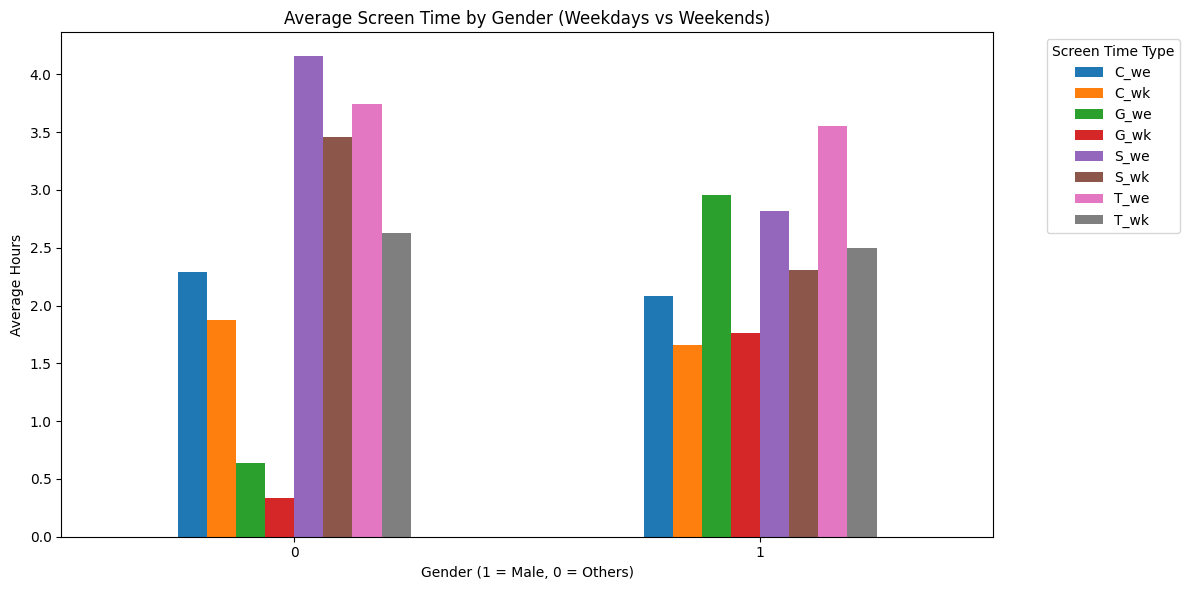

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df1 = pd.read_csv('/dataset1.csv')
df2 = pd.read_csv('/dataset2.csv')
# Merge dataset1 and dataset2 on 'ID'
df_merged = pd.merge(df1, df2, on="ID")

# Calculate mean screen time for weekdays and weekends by gender
gender_avg_screen_time = df_merged.groupby('gender')[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].mean()

# Plot bar chart for average screen time by gender
gender_avg_screen_time.plot(kind='bar', figsize=(12, 6))
plt.title("Average Screen Time by Gender (Weekdays vs Weekends)")
plt.xlabel("Gender (1 = Male, 0 = Others)")
plt.ylabel("Average Hours")
plt.xticks(rotation=0)
plt.legend(title="Screen Time Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


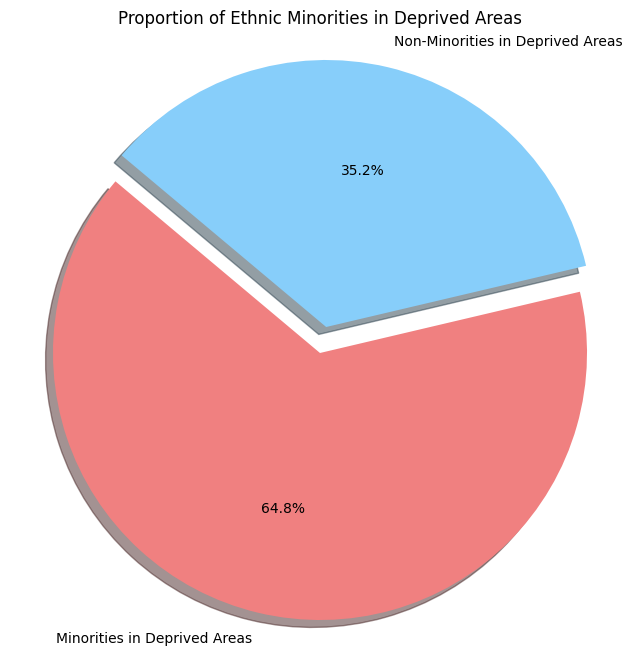

In [7]:
# Calculate the proportion of minorities in deprived areas
minority_deprived = df1.groupby(['minority', 'deprived']).size().unstack(fill_value=0)
minority_in_deprived = minority_deprived.loc[1, 1] / minority_deprived.loc[1].sum() * 100
non_minority_in_deprived = 100 - minority_in_deprived

# Pie chart for proportions
labels = ['Minorities in Deprived Areas', 'Non-Minorities in Deprived Areas']
sizes = [minority_in_deprived, non_minority_in_deprived]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Ethnic Minorities in Deprived Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


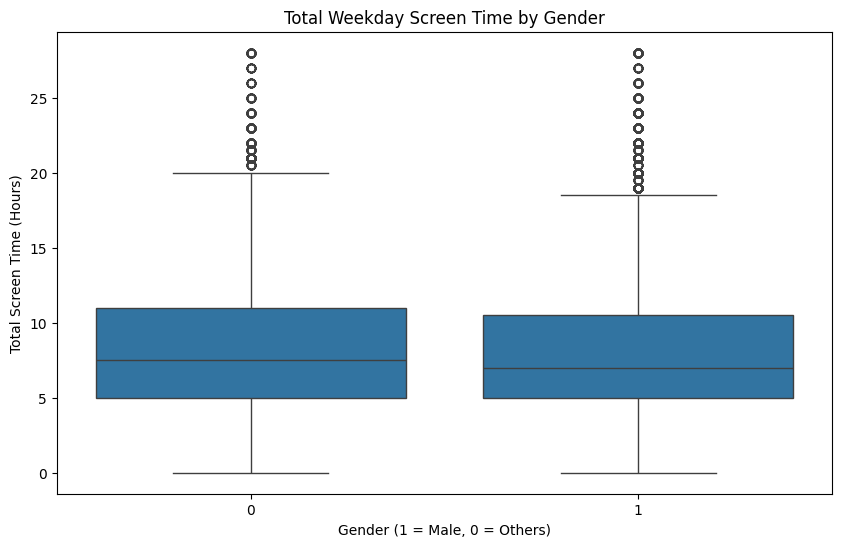

In [8]:
# Calculate total weekday and weekend screen time
df_merged['total_weekday_screen_time'] = df_merged[['C_wk', 'G_wk', 'S_wk', 'T_wk']].sum(axis=1)
df_merged['total_weekend_screen_time'] = df_merged[['C_we', 'G_we', 'S_we', 'T_we']].sum(axis=1)

# Box plot for total weekday screen time by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='total_weekday_screen_time', data=df_merged)
plt.title('Total Weekday Screen Time by Gender')
plt.xlabel('Gender (1 = Male, 0 = Others)')
plt.ylabel('Total Screen Time (Hours)')
plt.show()


Index(['ID', 'gender', 'minority', 'deprived', 'C_we', 'C_wk', 'G_we', 'G_wk',
       'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx', 'Intp', 'Engs',
       'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved',
       'Intthg', 'Cheer'],
      dtype='object')


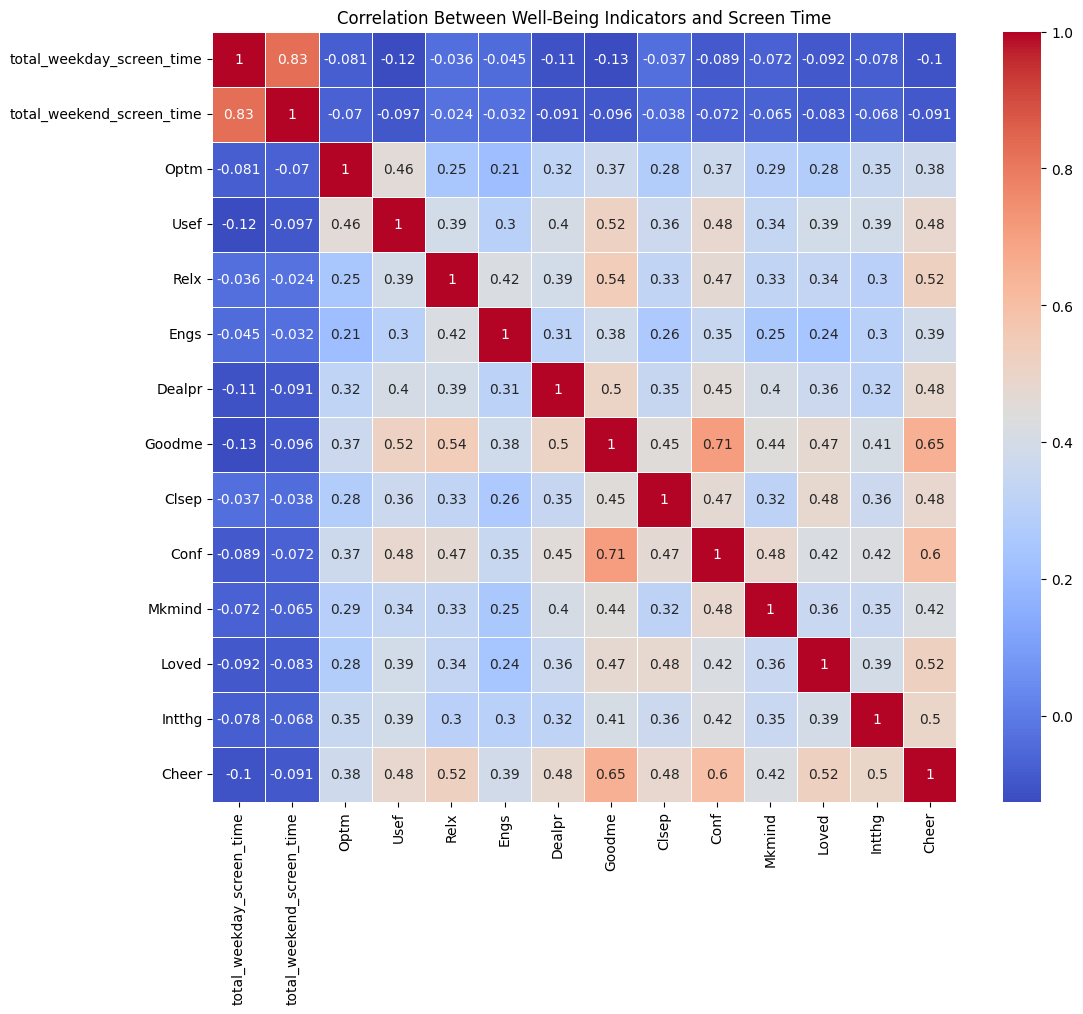

In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (assuming the path to your datasets is correct)
df1 = pd.read_csv('/dataset1.csv')  # Demographic data
df2 = pd.read_csv('/dataset2.csv')  # Screen time data
df3 = pd.read_csv('/dataset3.csv')  # Well-being data

# Merge dataset1, dataset2, and dataset3 to get a combined dataframe
df_combined = pd.merge(pd.merge(df1, df2, on="ID"), df3, on="ID")

# Check column names to find the correct well-being column names
print(df_combined.columns)

# If you see the actual well-being column names, update the list accordingly
# Sample well-being column names, adjust based on actual dataset
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Engs', 'Dealpr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Calculate total screen time for both weekdays and weekends
df_combined['total_weekday_screen_time'] = df_combined[['C_wk', 'G_wk', 'S_wk', 'T_wk']].sum(axis=1)
df_combined['total_weekend_screen_time'] = df_combined[['C_we', 'G_we', 'S_we', 'T_we']].sum(axis=1)

# Select well-being indicators and screen time for correlation analysis
# Only include columns that exist in your data
correlation_data = df_combined[['total_weekday_screen_time', 'total_weekend_screen_time'] + wellbeing_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Well-Being Indicators and Screen Time')
plt.show()
